In [140]:
# Import TensorFlow, Numpy and Matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [141]:
X_test = np.load('/content/X_test.npy')
X_train = np.load('/content/X_train.npy')
X_val = np.load('/content/X_val.npy')
y_test = np.load('/content/y_test.npy')
y_train = np.load('/content/y_train.npy')
y_val = np.load('/content/y_val.npy')

In [142]:
print(f"Length of the X training dataset: {len(X_train)}")
print(f"Length of the X validation dataset: {len(X_val)}")
print(f"Length of the X test dataset: {len(X_test)}")
print(f"Length of the Y training dataset: {len(y_train)}")
print(f"Length of the Y validation dataset: {len(y_val)}")
print(f"Length of the Y test dataset: {len(y_test)}")


Length of the X training dataset: 6985
Length of the X validation dataset: 873
Length of the X test dataset: 874
Length of the Y training dataset: 6985
Length of the Y validation dataset: 873
Length of the Y test dataset: 874


In [143]:
X_train.shape

(6985, 32, 32, 1)

In [144]:
X_test[456]

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.00392157],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.00392157],
        [0.02745098],
        [0.        ]],

       ...,

       [[0.52941176],
        [0.49019608],
        [0.55294118],
        ...,
        [0.70980392],
        [0.55294118],
        [0.60392157]],

       [[0.34117647],
        [0.64705882],
        [0.55294118],
        ...,
        [0.92941176],
        [0.68235294],
        [0.48235294]],

       [[0.21568627],
        [0.30196078],
        [0.47058824],
        ...,
        [0.64705882],
        [0.69803922],
        [0.65098039]]])

In [145]:
model = tf.keras.Sequential()

In [146]:
# Add a convolution and max pooling layer
#### activation func are hyper-parameters so we have to figure out best by try and error
#### activation functions "10age", "rickyRelu", "elu"
model.add(tf.keras.layers.Conv2D(32, 
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [147]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(32,32,1)))

In [148]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [149]:
#### The numbers in this stage are selected arbitrarily, for that reason you may tweak them to improve model performance.
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [150]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [151]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
# Train the model for 50 epochs with batch size of 128
#### Batch size is a hyperparameter which used in large datasets to speed up computation time. 
#### It is recommended to choose powers of 2.
#### This stage might be done with multiple computers using differnt hyperparameters to see how variant values
#### effects model performance.
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
55/55 [==============================] - 13s 229ms/step - loss: 2.1119 - accuracy: 0.2086 - val_loss: 1.7936 - val_accuracy: 0.4353
Epoch 2/50
55/55 [==============================] - 12s 226ms/step - loss: 1.7973 - accuracy: 0.3533 - val_loss: 1.4750 - val_accuracy: 0.5120
Epoch 3/50
55/55 [==============================] - 14s 249ms/step - loss: 1.5793 - accuracy: 0.4355 - val_loss: 1.2687 - val_accuracy: 0.5979
Epoch 4/50
55/55 [==============================] - 13s 228ms/step - loss: 1.4202 - accuracy: 0.5048 - val_loss: 1.2037 - val_accuracy: 0.6208
Epoch 5/50
55/55 [==============================] - 13s 228ms/step - loss: 1.2986 - accuracy: 0.5569 - val_loss: 1.0453 - val_accuracy: 0.6838
Epoch 6/50
55/55 [==============================] - 12s 227ms/step - loss: 1.1885 - accuracy: 0.5946 - val_loss: 0.9368 - val_accuracy: 0.7045
Epoch 7/50
55/55 [==============================] - 13s 227ms/step - loss: 1.1222 - accuracy: 0.6233 - val_loss: 0.8792 - val_accuracy: 0.7194

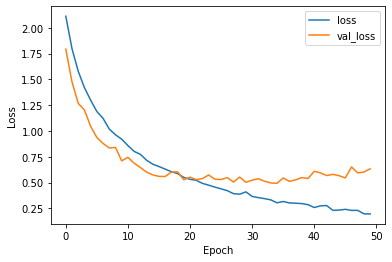

In [153]:
# Plot the the training loss
plt.plot(results.history['loss'], label='loss')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [154]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 17ms/step - loss: 0.6633 - accuracy: 0.8570


[0.6633307337760925, 0.8569794297218323]

In [155]:
test_result = model.test_on_batch(X_test, y_test)
print(test_result)

[0.6633307337760925, 0.8569794297218323]


In [156]:
# Make prediction on the reshaped sample
#### (1,32,32,3) means that we have 1 image, 32 to 32 by 3 channels
prediction_result = model.predict(X_test[789].reshape(1,32,32,1))

# Print the prediction result
prediction_result

array([[1.1437932e-10, 2.7143599e-18, 7.5672621e-20, 8.0470166e-20,
        3.6893468e-07, 1.5618315e-12, 4.0683511e-19, 9.9999964e-01,
        5.7408383e-20, 4.0093739e-19]], dtype=float32)

In [157]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
prediction_probability = prediction_result.max()

Image class 7, has 0.9999996423721313 probability.


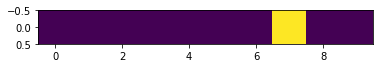

In [158]:
# Print the results
print(f"Image class {predicted_class}, has {prediction_probability} probability.")
plt.imshow(prediction_result)